# <center> Pacmann Final Project Probability : Probability Analysis of US Health Insurance Dataset

## <center> Balqis Dwian Fitri Zamzami - ADS Batch 13

### Import Libraryˎˊ˗ ✰

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

### Import & Load Datasetˎˊ˗ ✰

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Descriptive Statistical Problem
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Analysis of Descriptive Statisticsˎˊ˗ ✰

##### 1. Average age of insurance members

In [7]:
user_age_mean = np.mean(df["age"])
print("Average age of insurance members : ", user_age_mean)

Average age of insurance members :  39.20702541106129


##### 2. Average BMI of insurance members who are smokers

In [8]:
smokers = df[df["smoker"] == "yes"]
smokers_bmi_mean = np.mean(smokers["bmi"])

print("Average BMI of insurance members who are smokers : ", smokers_bmi_mean)

Average BMI of insurance members who are smokers :  30.70844890510949


##### 3. Variance of the insurance charges where he/she is a smoker and non-smoker

In [9]:
smokers_charges = df[df["smoker"] == "yes"]["charges"]
non_smokers_charges = df[df["smoker"] == "no"]["charges"]

# Variance of smoker data
smokers_charges_var = np.var(smokers_charges)
print("Variance of smoker data : ", smokers_charges_var)

# Variance of non-smoker data
non_smokers_charges_var = np.var(non_smokers_charges)
print("Variance of non-smoker data : ", non_smokers_charges_var)

if (smokers_charges_var == non_smokers_charges_var):
    print("Variance of charges data from smokers and non-smokers is equal, ")
else:
    print("Variance of charges data from smokers and non-smokers is different")

Variance of smoker data :  132721153.13625307
Variance of non-smoker data :  35891656.00316426
Variance of charges data from smokers and non-smokers is different


##### 4. Average age of female and male insurance members who smoke

In [10]:
male_smokers = df[(df["sex"] == "male") & (df["smoker"] == "yes")]
female_smoker = df[(df["sex"] == "female") & (df["smoker"] == "yes")]

# Average age of male smoker
male_smoker_mean = np.mean(male_smokers["age"])
print("Average age of male smoker : ", male_smoker_mean)

# Average age of female smoker
female_smoker_mean = np.mean(female_smoker["age"])
print("Average age of female smoker : ", female_smoker_mean)

if (male_smoker_mean == female_smoker_mean):
    print("Average age of female and male smokers is equal")
else:
    print("Average age of female and male smokers is different")

Average age of male smoker :  38.44654088050314
Average age of female smoker :  38.608695652173914
Average age of female and male smokers is different


##### 5. Average insurance charges of smokers and non-smokers

In [11]:
smokers_charges = df[df["smoker"] == "yes"]["charges"]
non_smokers_charges = df[df["smoker"] == "no"]["charges"]

# Average insurance charge of smokers
smokers_charges_mean = np.mean(smokers_charges)
print("Average insurance charge of smokers : ", smokers_charges_mean)

# Average insurance charge of non-smokers
non_smokers_charges_mean = np.mean(non_smokers_charges)
print("Average insurance charge of non-smokers : ", non_smokers_charges_mean)

if (smokers_charges_mean > non_smokers_charges_mean):
    print("Average insurance charge of smokers is higher than average insurance charge of non-smokers")
elif (non_smokers_charges_mean > smokers_charges_mean):
    print("Average insurance charge of non-smokers is higher than average insurance charge of smokers is higher")

Average insurance charge of smokers :  32050.23183153284
Average insurance charge of non-smokers :  8434.268297856204
Average insurance charge of smokers is higher than average insurance charge of non-smokers


### Analysis of Categorical Variables (PMF)ˎˊ˗ ✰

##### 1. Which gender has the highest charge?

In [12]:
# Reshaping Table to be grouped based on the region and charges value
# Data on male and female insurance charge
male_charges = df[df["sex"] == "male"]["charges"]
female_charges = df[df["sex"] == "female"]["charges"]

# Data on average age of female and male 
male_charges_highest = np.mean(male_charges)
female_charges_highest = np.mean(female_charges)

print("Highest female insurance charge data : ", female_charges_highest )
print("Highest male insurance charge data : ", male_charges_highest)

if (male_charges_highest > female_charges_highest):
    print("Males have the highest insurance charge data")
elif (female_charges_highest > male_charges_highest):
    print("Females have the highest insurance charge data")

Highest female insurance charge data :  12569.578843835347
Highest male insurance charge data :  13956.751177721893
Males have the highest insurance charge data


##### 2. Does each region have the same proportion of people?

In [13]:
data_per_region = df.groupby("region")["region"].count()
proportion_per_region = data_per_region/data_per_region.sum()
print("The proportion per region")
print(proportion_per_region)

The proportion per region
region
northeast    0.242152
northwest    0.242900
southeast    0.272048
southwest    0.242900
Name: region, dtype: float64


##### 3. Which region has a higher proportion of smokers or non-smokers?

In [14]:
smoker_proportion = df.groupby("smoker")["smoker"].count()
smoker_proportion = smoker_proportion/smoker_proportion.sum()

print("Proportion of non-smokers is ", smoker_proportion.loc["no"])
print("Proportion of smokers is ", smoker_proportion.loc["yes"])

Proportion of non-smokers is  0.7952167414050823
Proportion of smokers is  0.20478325859491778


##### 4. What is the probability that a person who is female is known to be a smoker?

In [15]:
n_female_and_smoker = df[(df["sex"] == "female") & (df["smoker"] == "yes")]["smoker"].count()
n_smoker = df[df["smoker"] == "yes"]["smoker"].count()

p_female_given_smoker = n_female_and_smoker/n_smoker
print("The probability that a randomly selected insurance member is female if it is known that she is a smoker : ", p_female_given_smoker)

The probability that a randomly selected insurance member is female if it is known that she is a smoker :  0.4197080291970803


##### 5. What is the probability that a person is a male known to be a smoker?

In [16]:
n_male_and_smoker = df[(df["sex"] == "male") & (df["smoker"] == "yes")]["smoker"].count()
n_smoker = df[df["smoker"] == "yes"]["smoker"].count()

p_male_given_smoker = n_male_and_smoker/n_smoker
print("The probability that a randomly selected insurance member is male if it is known that he is a smoker : ",p_male_given_smoker)

The probability that a randomly selected insurance member is male if it is known that he is a smoker :  0.5802919708029197


### Analysis of Continuous Variablesˎˊ˗ ✰

##### 1. Which is more likely to happen

##### a. A person with a BMI above 25 gets a health bill above 16.7k, or

In [17]:
n_high_bmi_charges = df[(df["bmi"] > 25) & (df["charges"] > 16700)]["charges"]
n_charges = df[df["charges"] > 16700]["charges"]
p_high_bmi_charges = n_high_bmi_charges.count()/n_charges.count()

print("Probability value : ", p_high_bmi_charges)

Probability value :  0.8473053892215568


##### b. A person with a BMI below 25 gets a health bill above 16.7k

In [18]:
n_low_bmi_charges = df[(df["bmi"] < 25) & (df["charges"] > 16700)]["charges"]
n_charges = df[df["charges"] > 16700]["charges"]
p_low_charges = n_low_bmi_charges.count()/n_charges.count()

print("Probability value : ", p_low_charges)

Probability value :  0.15269461077844312


If we compare, we get the value :

In [19]:
if (p_high_bmi_charges > p_low_charges):
    print("What may happen is that someone with a BMI > 25 gets a health bill of more than 16700")
elif(p_high_bmi_charges > p_low_charges):
    print("What may happen is that someone with a BMI < 25 gets a health bill of more than 16700")

What may happen is that someone with a BMI > 25 gets a health bill of more than 16700


##### 2. Which is more likely to happen

##### a. A smoker with a BMI above 25 gets a health charge of above 16.7k, or

In [20]:
smoker_high_bmi = df[(df["smoker"] == "yes") & (df["bmi"] > 25)]

n_smoker_high_bmi_charges = smoker_high_bmi[smoker_high_bmi["charges"] > 16700]["charges"].count()
n_smoker_charges = smoker_high_bmi["charges"].count()
p_smoker_high_bmi_high_charges = n_smoker_high_bmi_charges/n_smoker_charges

print("Probability value : ", n_smoker_high_bmi_charges/n_smoker_charges)

Probability value :  0.9817351598173516


##### b. A non-smoker with a BMI above 25 gets a health charge above 16.7k

In [21]:
non_smoker_high_bmi = df[(df["smoker"] == "no") & (df["bmi"] > 25)]

n_non_smoker_high_bmi_charges = non_smoker_high_bmi[non_smoker_high_bmi["charges"] > 16700]["charges"].count()
n_non_smoker_charges = non_smoker_high_bmi["charges"].count()
p_non_smoker_high_bmi_high_charges = n_non_smoker_high_bmi_charges/n_non_smoker_charges

print("Probability value : ", p_non_smoker_high_bmi_high_charges)

Probability value :  0.0779816513761468


### Analysis of Variable Correlationˎˊ˗ ✰

##### 1. Covariance and correlation between charges and bmi variables

In [22]:
df[['charges', 'bmi']].corr()

,charges,bmi
charges,1.000000,0.198341
bmi,0.198341,1.000000


In [23]:
np.cov(df["charges"], df['bmi'])

array([[1.46652372e+08, 1.46473044e+04],
       [1.46473044e+04, 3.71878836e+01]])

##### 2. Covariance and correlation between variable charges and smoker

In [24]:
df["smoker_code"] = df["smoker"].map({"yes": 1, "no": 0})
df[["smoker", "smoker_code"]][30:35]

,smoker,smoker_code
30,yes,1
31,no,0
32,no,0
33,no,0
34,yes,1


In [25]:
np.cov(df["charges"], df["smoker_code"])

array([[1.46652372e+08, 3.84866703e+03],
       [3.84866703e+03, 1.62968876e-01]])

In [26]:
df[['charges', 'smoker_code']].corr()

,charges,smoker_code
charges,1.000000,0.787251
smoker_code,0.787251,1.000000


##### 3. Covariance and correlation between bmi and sex variables

In [27]:
np.cov(df["bmi"], df["smoker_code"])

array([[3.71878836e+01, 9.23280485e-03],
       [9.23280485e-03, 1.62968876e-01]])

In [28]:
df[['bmi', 'smoker_code']].corr()

,bmi,smoker_code
bmi,1.00000,0.00375
smoker_code,0.00375,1.00000


##### 4. Covariance and correlation between variable charges and sex

In [29]:
df["gender_codes"] = df["sex"].map({"female": 1, "male": 0})

df[["sex", "gender_codes"]][10:15]

,sex,gender_codes
10,male,0
11,female,1
12,male,0
13,female,1
14,male,0


In [30]:
np.cov(df["charges"], df["gender_codes"])

array([[ 1.46652372e+08, -3.47014469e+02],
       [-3.47014469e+02,  2.50159595e-01]])

In [31]:
df[["charges", "gender_codes"]].corr()

,charges,gender_codes
charges,1.000000,-0.057292
gender_codes,-0.057292,1.000000


##### 5. Covariance and correlation between variable charges and age

In [32]:
np.cov(df["charges"], df["age"])

array([[1.46652372e+08, 5.08748023e+04],
       [5.08748023e+04, 1.97401387e+02]])

In [33]:
df[["charges", "age"]].corr()

,charges,age
charges,1.000000,0.299008
age,0.299008,1.000000


##### 6. Correlation Coefficient

In [34]:
import seaborn as sns

In [35]:
df1 = df.copy()

In [36]:
df1["smoker"] = df1["smoker"].map({"yes": 1, "no": 0})
df1.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,gender_codes
0,19,female,27.900,0,1,southwest,16884.92400,1,1
1,18,male,33.770,1,0,southeast,1725.55230,0,0
2,28,male,33.000,3,0,southeast,4449.46200,0,0
3,33,male,22.705,0,0,northwest,21984.47061,0,0
4,32,male,28.880,0,0,northwest,3866.85520,0,0


In [37]:
df1["sex"] = df1["sex"].map({"female": 1, "male": 0})
df1["region"] = df1["region"].map({
    "southwest": 0, 
    "southeast": 1, 
    "northwest": 2, 
    "northeast": 3,
})

df1.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,gender_codes
0,19,1,27.900,0,1,0,16884.92400,1,1
1,18,0,33.770,1,0,1,1725.55230,0,0
2,28,0,33.000,3,0,1,4449.46200,0,0
3,33,0,22.705,0,0,2,21984.47061,0,0
4,32,0,28.880,0,0,2,3866.85520,0,0


In [38]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges,smoker_code,gender_codes
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008,-0.025019,0.020856
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292,-0.076185,1.000000
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341,0.003750,-0.046371
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998,0.007673,-0.017163
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251,1.000000,-0.076185
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208,0.002181,0.004588
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000,0.787251,-0.057292
smoker_code,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251,1.000000,-0.076185
gender_codes,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292,-0.076185,1.000000


<Axes: >

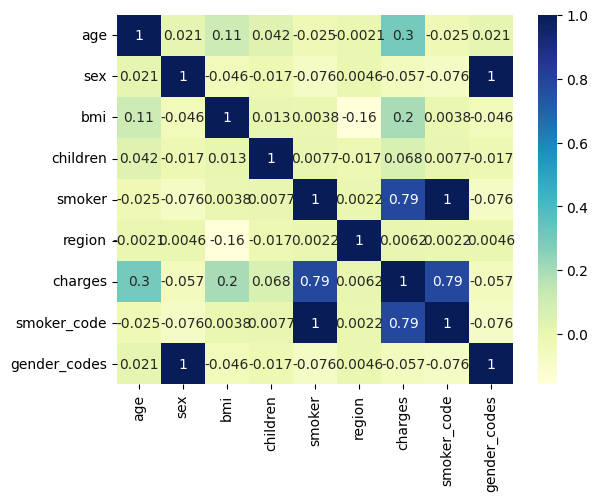

In [39]:
sns.heatmap(
    data=df1.corr(),
    cmap="YlGnBu",
    annot=True)

### Hypothesis Testingˎˊ˗ ✰

##### 1. Does the smoker insurance charge is higher than non-smoker?

In [40]:
# Number of smokers and non-smokers
smokers = df[df["smoker"] == "yes"]
non_smokers = df[df["smoker"] == "no"]

# Insurance charge
smokers_charges = smokers["charges"]
non_smokers_charges = non_smokers["charges"]

# Find the variance of the data
print("Variance from charges for smokers: ", np.var(smokers_charges))
print("Variance from Charges for non-smokers: ", np.var(non_smokers_charges))

Variance from charges for smokers:  132721153.13625307
Variance from Charges for non-smokers:  35891656.00316426


In [41]:
# Statistical Testing

t_statistics, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges, 
                                        alternative="less", equal_var=False)

print("t_statistcs value: ", t_statistics)
print("p_value: ", p_value)

t_statistcs value:  32.751887766341824
p_value:  1.0


In [42]:
# Conclusion

significance = 0.05
if p_value > significance:
    print("the null hypothesis is not rejected")
else:
    print("the null hypothesis is rejected")

the null hypothesis is not rejected


##### 2. Does the insurance charge for BMI greater than 25 is higher than BMI less than 25?

In [43]:
# Number of BMI
high_bmi = df[df["bmi"] > 25]
low_bmi = df[df["bmi"] < 25]

# Insurance charge
high_bmi_charges = high_bmi["charges"]
low_bmi_charges = low_bmi["charges"]

# Find the variance of the data
print("Variance from charges for high bmi: ", np.var(high_bmi_charges))
print("Variance from charges for low bmi: ", np.var(low_bmi_charges))

Variance from charges for high bmi:  164579189.52132663
Variance from charges for low bmi:  56326859.63068616


In [44]:
# Statistical Testing

t_statistics, p_value = stats.ttest_ind(high_bmi_charges, low_bmi_charges, 
                                        alternative="less", equal_var=False)

print("t_statistcs value: ", t_statistics)
print("p_value: ", p_value)

t_statistcs value:  5.929878344096734
p_value:  0.9999999974595514


In [45]:
# Conclusion

significance = 0.05
if p_value > significance:
    print("the null hypothesis is not rejected")
else:
    print("the null hypothesis is rejected")

the null hypothesis is not rejected


##### 3. Does the BMI of Male and Female are equal?

In [46]:
# Number of Male and Female
female = df[df["sex"] == "female"]
male = df[df["sex"] == "male"]

# BMI Female vs Male
female_bmi = female["bmi"]
male_bmi = male["bmi"]

# Mean of Male and Female BMI
print("Variance BMI of Female : ", np.var(female_bmi))
print("Variance BMI of Male : ", np.var(male_bmi))

Variance BMI of Female :  36.499177033798524
Variance BMI of Male :  37.64916073639534


In [47]:
# Statistical Testing

t_statistics, p_value = stats.ttest_ind(male_bmi, female_bmi, 
                                        alternative="two-sided", equal_var=True)

print("t_statistcs value: ", t_statistics)
print("p_value: ", p_value)

t_statistcs value:  1.696752635752224
p_value:  0.08997637178984934


In [48]:
# Conclusion

significance = 0.05
if p_value > significance:
    print("the null hypothesis is not rejected")
else:
    print("the null hypothesis is rejected")

the null hypothesis is not rejected
